In [1]:
import mne
#raw = mne.io.read_raw_edf('/Users/seandmello/Desktop/SleepStagingFolder/yasa_example_night_young.edf', preload=True)
raw = mne.io.read_raw_edf('/Users/seandmello/Downloads/fullNightCombined.edf', preload=True)
raw

Extracting EDF parameters from /Users/seandmello/Downloads/fullNightCombined.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5514705  =      0.000 ... 21457.996 secs...


<RawEDF | fullNightCombined.edf, 4 x 5514706 (21458.0 s), ~168.3 MiB, data loaded>

In [2]:
print(raw.ch_names)

['CH 1', 'CH 2', 'CH 3', 'CH 4']


In [3]:
#raw.drop_channels(['CH 1', 'CH 2', 'CH 3'])
chan = raw.ch_names
print(chan)

['CH 1', 'CH 2', 'CH 3', 'CH 4']


In [4]:
print(raw.info['sfreq'])

257.0


In [5]:
raw.resample(100)
sf = raw.info['sfreq']
sf

100.0

In [10]:
# We use "verbose" and ";" to disable the text output
>>> raw.filter(0.3, 45)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 1101 samples (11.010 s)



<RawEDF | fullNightCombined.edf, 4 x 2145800 (21458.0 s), ~65.5 MiB, data loaded>

In [11]:
import numpy as np

# Assuming 'raw' is an MNE Raw object
data = raw.get_data()

# Clip the EEG data between -200 and 200
data_clipped = np.clip(data, -200, 200)

# Now set the clipped data back into the raw object if needed
raw._data = data_clipped

In [12]:
data = raw.get_data(units="uV")
print(data.shape)

(4, 2145800)


In [13]:
import yasa

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/yasa/plotting.py:89: FutureWarning: 'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.
  freq_str = pd.tseries.frequencies.to_offset(pd.Timedelta(1 / sf_hypno, "S")).freqstr


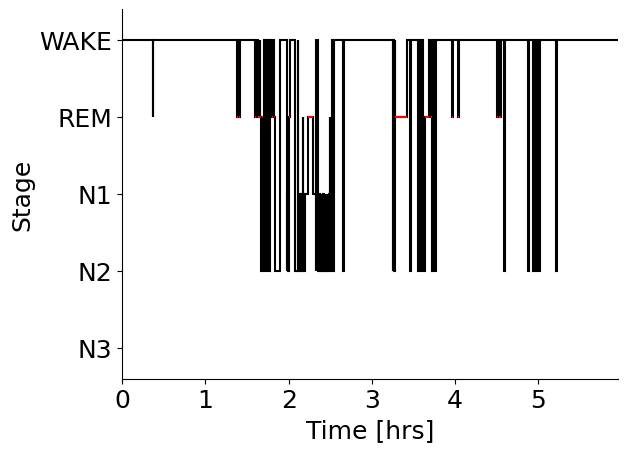

In [29]:
sls = yasa.SleepStaging(raw, eeg_name='CH 2')
sls

hypno_pred = sls.predict()  # Predict the sleep stages
hypno_pred = yasa.hypno_str_to_int(hypno_pred)  # Convert "W" to 0, "N1" to 1, etc
yasa.plot_hypnogram(hypno_pred);  # Plot

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.5.1. This might lead to breaking

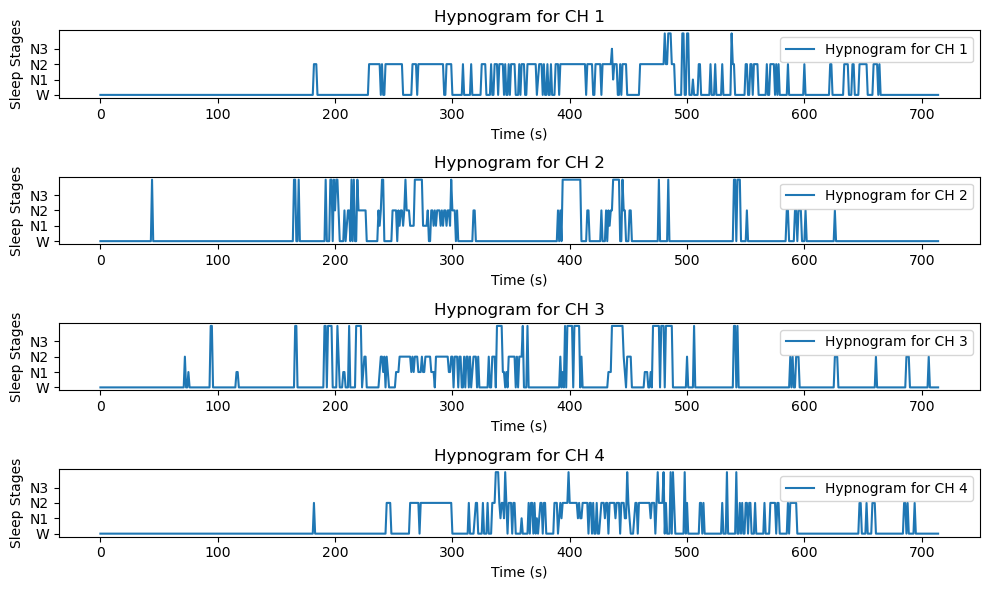

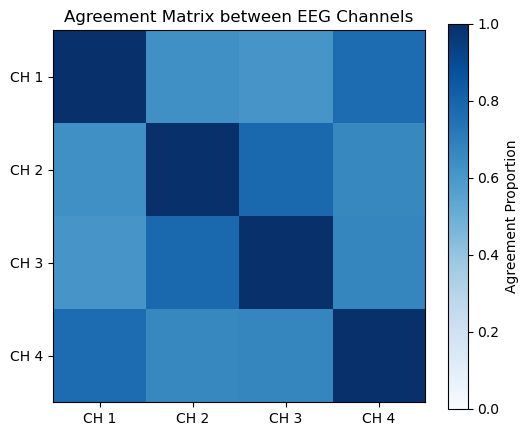

Agreement Matrix (proportion of sleep stages agreement):
[[1.         0.63076923 0.60839161 0.76783217]
 [0.63076923 1.         0.77902098 0.66293706]
 [0.60839161 0.77902098 1.         0.67132867]
 [0.76783217 0.66293706 0.67132867 1.        ]]


In [20]:
import yasa
import numpy as np
import matplotlib.pyplot as plt

# Assuming the 'raw' object from MNE is already loaded

# Define the EEG channels
eeg_channels = ['CH 1', 'CH 2', 'CH 3', 'CH 4']

# Dictionary to store hypnograms for each channel
hypnograms = {}

# Apply sleep staging for each channel and store the hypnogram
for ch in eeg_channels:
    sls = yasa.SleepStaging(raw, eeg_name=ch)
    hypno_pred = sls.predict()  # Predict the sleep stages
    hypno_pred_int = yasa.hypno_str_to_int(hypno_pred)  # Convert to numerical format
    hypnograms[ch] = hypno_pred_int  # Store the hypnogram

# Plot the hypnograms for all channels
plt.figure(figsize=(10, 6))
for idx, ch in enumerate(eeg_channels):
    plt.subplot(len(eeg_channels), 1, idx + 1)
    plt.plot(hypnograms[ch], label=f'Hypnogram for {ch}')
    plt.xlabel('Time (s)')
    plt.ylabel('Sleep Stages')
    plt.title(f'Hypnogram for {ch}')
    plt.yticks([0, 1, 2, 3], ['W', 'N1', 'N2', 'N3'])
    plt.legend()

plt.tight_layout()
plt.show()

# Now, let's calculate the agreement between the channels
# We can use a simple comparison of the hypnograms between channels
agreement_matrix = np.zeros((len(eeg_channels), len(eeg_channels)))

for i, ch1 in enumerate(eeg_channels):
    for j, ch2 in enumerate(eeg_channels):
        # Calculate the proportion of agreement between two channels
        agreement = np.mean(hypnograms[ch1] == hypnograms[ch2])
        agreement_matrix[i, j] = agreement

# Plot the agreement matrix
plt.figure(figsize=(6, 5))
plt.imshow(agreement_matrix, cmap='Blues', vmin=0, vmax=1)
plt.colorbar(label='Agreement Proportion')
plt.xticks(np.arange(len(eeg_channels)), eeg_channels)
plt.yticks(np.arange(len(eeg_channels)), eeg_channels)
plt.title('Agreement Matrix between EEG Channels')
plt.show()

# Output the agreement matrix
print("Agreement Matrix (proportion of sleep stages agreement):")
print(agreement_matrix)


In [21]:
sls

In [31]:
hypno_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 4,
       0, 4, 2, 4, 4, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 0, 4, 0, 4, 0, 0, 4,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 4, 4,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 4, 2, 2, 2,
       1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 2, 0, 0, 2, 2, 1, 2,
       1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 4, 2,

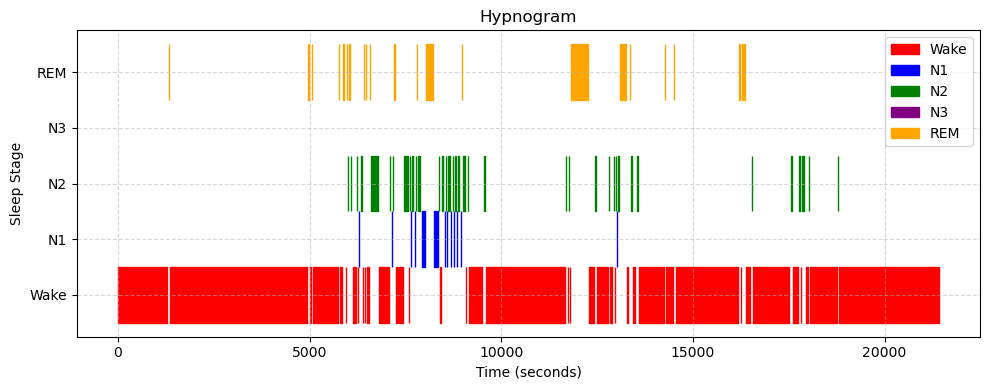

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Example hypnogram array (replace this with your `hypno_pred`)

# Define sleep stage labels and colors
stage_labels = {0: 'Wake', 1: 'N1', 2: 'N2', 3: 'N3', 4: 'REM'}
stage_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'orange'}

# Create a time vector (assuming 30-second epochs)
epoch_duration = 30  # seconds
time = np.arange(0, len(hypno_pred) * epoch_duration, epoch_duration)

# Plot the hypnogram
plt.figure(figsize=(10, 4))

for stage in stage_labels:
    plt.fill_between(
        time,
        y1=stage - 0.5,
        y2=stage + 0.5,
        where=(hypno_pred == stage),
        color=stage_colors[stage],
        label=stage_labels[stage]
    )

# Customize the plot
plt.yticks(list(stage_labels.keys()), list(stage_labels.values()))
plt.xlabel('Time (seconds)')
plt.ylabel('Sleep Stage')
plt.title('Hypnogram')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/yasa/plotting.py:89: FutureWarning: 'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.
  freq_str = pd.tseries.frequencies.to_offset(pd.Timedelta(1 / sf_hypno, "S")).freqstr


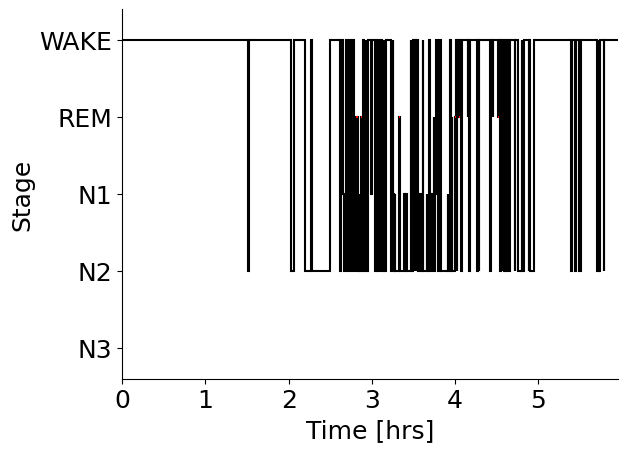

In [35]:
sls = yasa.SleepStaging(raw, eeg_name='CH 4')
sls

hypno_pred = sls.predict()  # Predict the sleep stages
hypno_pred = yasa.hypno_str_to_int(hypno_pred)  # Convert "W" to 0, "N1" to 1, etc
yasa.plot_hypnogram(hypno_pred);  # Plot

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Select one channel by name (e.g., 'C3')
raw.pick(['CH 3'])  # Replace 'C3' with the desired channel name

# Verify the selection
print("Selected channel:", raw.ch_names)

# Extract data from the selected channel
data, times = raw.get_data(units="uV", return_times=True)

# Print the shape of the data
print("Data shape:", data.shape)  # Should be (1, n_samples)

# Convert the data to a 1D NumPy array
data_1d = np.squeeze(data)  # Removes singleton dimensions

# Print the shape of the data
print("Data shape:", data_1d.shape)  # Should be (n_samples,)

Selected channel: ['CH 3']
Data shape: (1, 2145800)
Data shape: (2145800,)


In [41]:
import numpy as np

# Assuming:
# - sf is the sampling frequency of the EEG data
# - hypno_pred is the hypnogram in 30-second epochs

# Example sampling frequency (replace with your actual value)
sf = 100  # in Hz

# Calculate the number of samples per epoch
samples_per_epoch = int(30 * 257)  # 30 seconds * sampling rate

# Repeat each sleep stage value to match the EEG data length
hypno_pred_expanded = np.repeat(hypno_pred, samples_per_epoch)

# Trim hypno_pred_expanded to match the length of data_1d
# (in case the last epoch is incomplete)
hypno_pred_expanded = hypno_pred_expanded[:len(data_1d)]

# Verify the lengths
print("Length of data:", len(data_1d))
print("Length of hypno_pred_expanded:", len(hypno_pred_expanded))

Length of data: 2145800
Length of hypno_pred_expanded: 2145800


In [45]:
fig = yasa.plot_spectrogram(data_1d, sf, hypno_pred_expanded, cmap='Spectral_r')

# Save the figure to a file
spectrogram_filename = "/Users/seandmello/Downloads/spectrogram.png"
fig.savefig(spectrogram_filename)

# Optionally, close the plot to avoid display issues in some environments
plt.close()

print(f"Spectrogram saved as {spectrogram_filename}")

Spectrogram saved as /Users/seandmello/Downloads/spectrogram.png


In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Select one channel by name (e.g., 'CH 3')
raw.pick_channels(['CH 3'])  # Replace 'CH 3' with your desired channel name

# Verify the selection
print("Selected channel:", raw.ch_names)

# Extract data from the selected channel
data, times = raw.get_data(units="uV", return_times=True)

# Print the shape of the data
print("Data shape:", data.shape)  # Should be (1, n_samples)

# Convert the data to a 1D NumPy array
data_1d = np.squeeze(data)  # Removes singleton dimensions

# Print the shape of the data
print("Data shape:", data_1d.shape)  # Should be (n_samples,)

# Get the sampling frequency
sfreq = raw.info['sfreq']  # Sampling frequency in Hz

# Define the duration (1 minute)
duration_sec = 60  # 60 seconds

# Calculate the number of samples corresponding to 1 minute
num_samples = int(sfreq * duration_sec)

# Select only the first 1-minute portion of the data
data_1min = data_1d[:num_samples]
times_1min = times[:num_samples]

# Plot the data
plt.figure(figsize=(12, 5))
plt.plot(times_1min, data_1min, label="EEG Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (µV)")
plt.title("1-Minute EEG Signal from Channel 'CH 3'")
plt.legend()
plt.show()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


ValueError: Missing channels from ch_names required by include:
['CH 3']

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Selected channel: ['CH 3']


Enter the start time in seconds:  1000


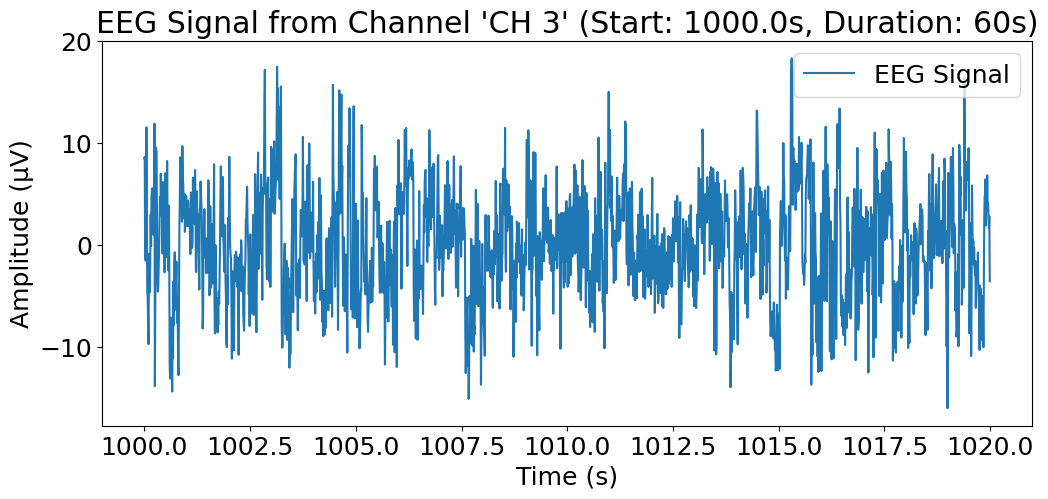

In [134]:
import numpy as np
import matplotlib.pyplot as plt

# Select one channel by name (e.g., 'CH 3')
raw.pick_channels(['CH 3'])  # Replace 'CH 3' with your desired channel name

# Verify the selection
print("Selected channel:", raw.ch_names)

# Extract data from the selected channel
data, times = raw.get_data(units="uV", return_times=True)

# Convert the data to a 1D NumPy array
data_1d = np.squeeze(data)

# Get the sampling frequency
sfreq = raw.info['sfreq']  # Sampling frequency in Hz

# Allow user to choose the starting time
start_time_sec = float(input("Enter the start time in seconds: "))

# Define the duration (1 minute)
duration_sec = 20  

# Convert start time to sample index
start_sample = int(start_time_sec * sfreq)
end_sample = start_sample + int(duration_sec * sfreq)

# Ensure the selection does not exceed the data length
if end_sample > len(data_1d):
    print("Warning: Selected time range exceeds available data. Adjusting to fit.")
    end_sample = len(data_1d)
    start_sample = end_sample - int(duration_sec * sfreq)

# Select the data segment
data_segment = data_1d[start_sample:end_sample]
times_segment = times[start_sample:end_sample]

# Plot the selected data
plt.figure(figsize=(12, 5))
plt.plot(times_segment, data_segment, label="EEG Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (µV)")
plt.title(f"EEG Signal from Channel 'CH 3' (Start: {start_time_sec}s, Duration: 60s)")
plt.legend()
plt.show()


{'TIB': 357.5, 'SPT': 317.5, 'WASO': 222.5, 'TST': 95.0, 'N1': 18.5, 'N2': 44.5, 'N3': 0.0, 'REM': 32.0, 'NREM': 63.0, 'SOL': 36.0, 'Lat_N1': 37.5, 'Lat_N2': 36.0, 'Lat_N3': nan, 'Lat_REM': 47.0, '%N1': 19.473684210526315, '%N2': 46.8421052631579, '%N3': 0.0, '%REM': 33.68421052631579, '%NREM': 66.3157894736842, 'SE': 26.573426573426573, 'SME': 29.921259842519685}


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/yasa/plotting.py:89: FutureWarning: 'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.
  freq_str = pd.tseries.frequencies.to_offset(pd.Timedelta(1 / sf_hypno, "S")).freqstr


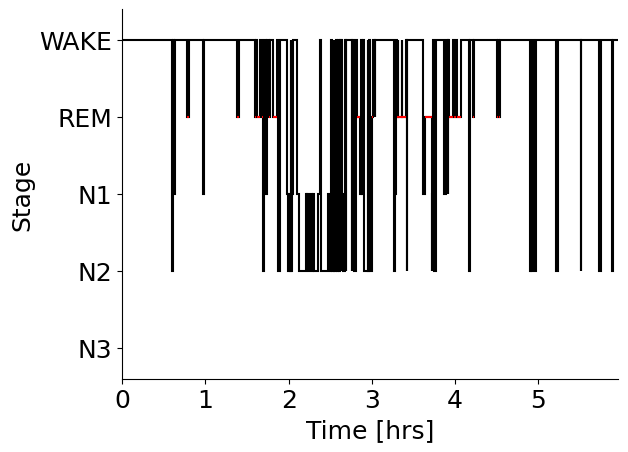

In [49]:
import yasa

# Assuming `raw` is your EEG data object (e.g., MNE Raw)
sls = yasa.SleepStaging(raw, eeg_name='CH 3')  # Set up the sleep staging object

# Predict sleep stages
hypno_pred = sls.predict()

# Convert the predicted sleep stages from string to integers (e.g., "W" -> 0, "N1" -> 1)
hypno_pred_int = yasa.hypno_str_to_int(hypno_pred)

# Plot the hypnogram
yasa.plot_hypnogram(hypno_pred_int)
sf_hyp = 1 / 30  # Example: One epoch = 30 seconds
stats = yasa.sleep_statistics(hypno_pred_int, sf_hyp=sf_hyp)
print(stats)



In [51]:
import yasa
import matplotlib.pyplot as plt
from fpdf import FPDF



# Calculate sleep statistics
sf_hyp = 1 / 30  # Example for 30-second epochs
stats = yasa.sleep_statistics(hypno_pred_int, sf_hyp=sf_hyp)



/opt/anaconda3/lib/python3.12/site-packages/yasa/plotting.py:89: FutureWarning: 'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.
  freq_str = pd.tseries.frequencies.to_offset(pd.Timedelta(1 / sf_hypno, "S")).freqstr


ImportError: cannot import name 'psd_multitaper' from 'mne.time_frequency' (/opt/anaconda3/lib/python3.12/site-packages/mne/time_frequency/__init__.py)

In [53]:
# Create a PDF document
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()

# Title
pdf.set_font("Arial", 'B', 16)
pdf.cell(200, 10, "Sleep Statistics Report", ln=True, align="C")

# Add sleep statistics (from `stats`)
pdf.ln(10)  # Line break
pdf.set_font("Arial", size=12)
for key, value in stats.items():
    pdf.cell(200, 10, f"{key}: {value}", ln=True)

# Add Spectral Density plot
pdf.ln(10)  # Line break
pdf.cell(200, 10, "Spectral Density", ln=True)
pdf.ln(5)  # Line break
pdf.image("/Users/seandmello/Downloads/spectrogram.png", x=10, w=180)

# Save the PDF
pdf_output_filename = "/Users/seandmello/Downloads/sleep_report.pdf"
pdf.output(pdf_output_filename)

# Provide download link
print(f"PDF report generated: {pdf_output_filename}")


PDF report generated: /Users/seandmello/Downloads/sleep_report.pdf
